## Import Libraries 

In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Import The Data 

In [31]:
df = pd.read_csv('/Users/ramazansamilacak/Desktop/failed bank/banklist.csv', encoding='latin-1')

## Basic Data Informations  

In [32]:
df.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,3-Nov-23,10545
1,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",28-Jul-23,10544
2,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
3,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
4,Silicon Valley Bank,Santa Clara,CA,24735,FirstCitizens Bank & Trust Company,10-Mar-23,10539


In [33]:
df.shape

(568, 7)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bank Name               568 non-null    object
 1   City                    568 non-null    object
 2   State                   568 non-null    object
 3   Cert                    568 non-null    int64 
 4   Acquiring Institution   568 non-null    object
 5   Closing Date            568 non-null    object
 6   Fund                    568 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.2+ KB


In [35]:
df.columns

Index(['Bank Name ', 'City ', 'State ', 'Cert ', 'Acquiring Institution ',
       'Closing Date ', 'Fund'],
      dtype='object')

## Duplicate Values

In [36]:
df.duplicated().any()

False

## Missing Value 

In [37]:
df.isna().sum()

Bank Name                 0
City                      0
State                     0
Cert                      0
Acquiring Institution     0
Closing Date              0
Fund                      0
dtype: int64

## Closing Date 

Change the type of the data as "date time"

In [38]:
df['Closing Date\xa0']

0       3-Nov-23
1      28-Jul-23
2       1-May-23
3      12-Mar-23
4      10-Mar-23
         ...    
563    27-Jul-01
564     3-May-01
565     2-Feb-01
566    14-Dec-00
567    13-Oct-00
Name: Closing Date , Length: 568, dtype: object

In [39]:
df2 = df.copy()

In [40]:
df2['Closing Date\xa0'] = pd.to_datetime(df2['Closing Date\xa0'], format='%d-%b-%y')

## 

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Bank Name               568 non-null    object        
 1   City                    568 non-null    object        
 2   State                   568 non-null    object        
 3   Cert                    568 non-null    int64         
 4   Acquiring Institution   568 non-null    object        
 5   Closing Date            568 non-null    datetime64[ns]
 6   Fund                    568 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 31.2+ KB


## Basic Analyze

### Fund Column

In [42]:
df2['Fund'].describe()

count      568.000000
mean     10041.323944
std       1111.414337
min       4645.000000
25%      10117.750000
50%      10259.500000
75%      10401.250000
max      10545.000000
Name: Fund, dtype: float64

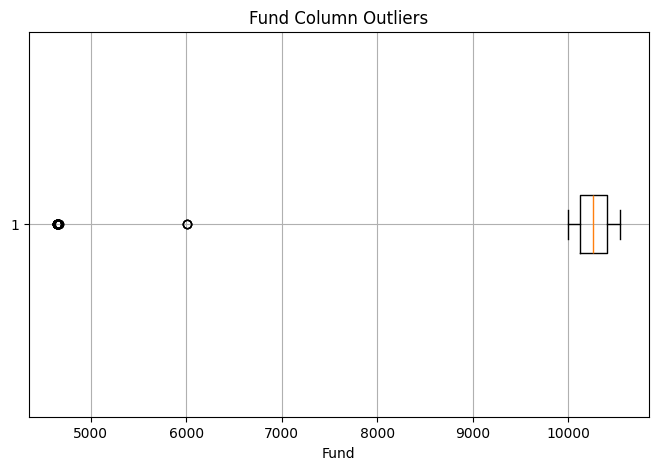

In [43]:
# Create box plot
plt.figure(figsize=(8, 5))
plt.boxplot(df2['Fund'], vert=False)
plt.title('Fund Column Outliers')
plt.xlabel('Fund')
plt.grid(True)
plt.show()

### Closing Date - Fund Relations 

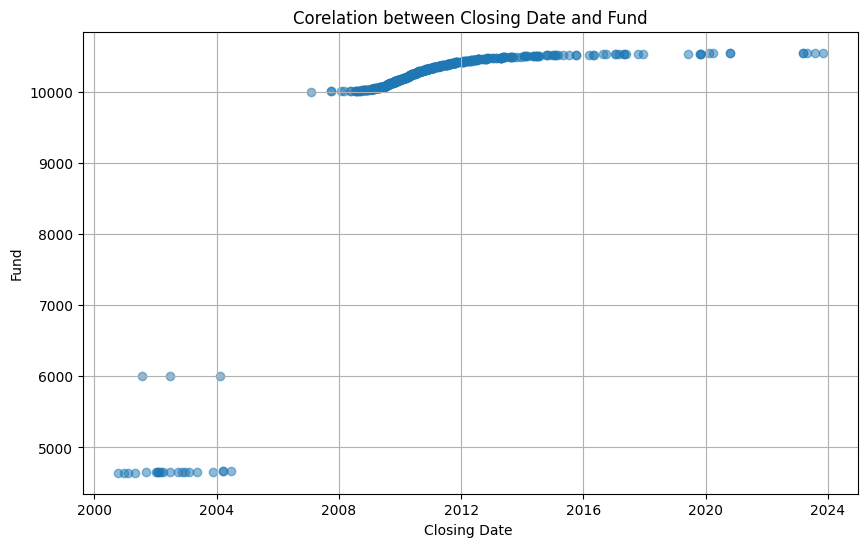

In [44]:
# Create Scatter plot 
plt.figure(figsize=(10, 6))
plt.scatter(df2['Closing Date\xa0'], df2['Fund'], alpha=0.5)
plt.title('Corelation between Closing Date and Fund')
plt.xlabel('Closing Date\xa0')
plt.ylabel('Fund')
plt.grid(True)
plt.show()

#### Time Series Analysis 

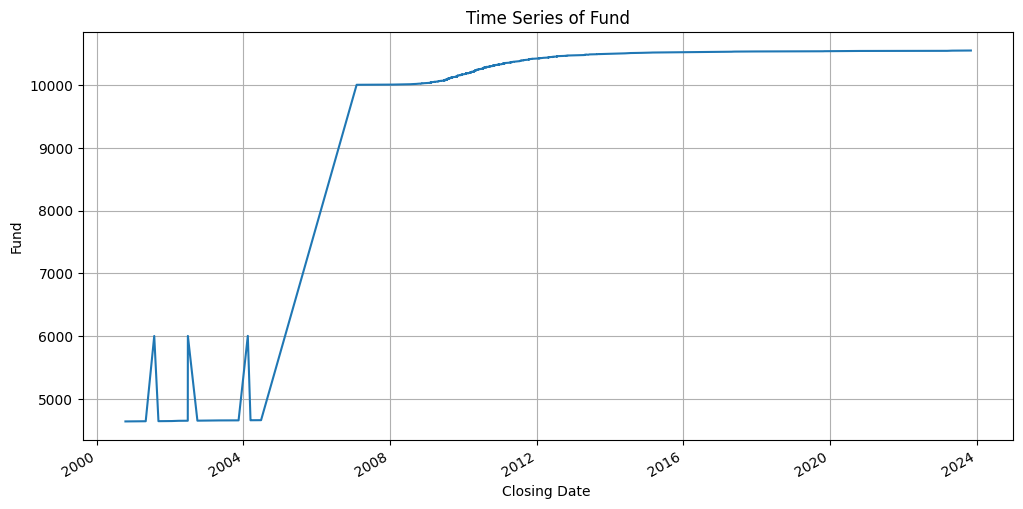

In [45]:
# Let's set the Closing Date column as an index
df2.set_index('Closing Date\xa0', inplace=True)

# Time series chart of Fund column
plt.figure(figsize=(12, 6))
df2['Fund'].plot()
plt.title('Time Series of Fund')
plt.xlabel('Closing Date\xa0')
plt.ylabel('Fund')
plt.grid(True)
plt.show()


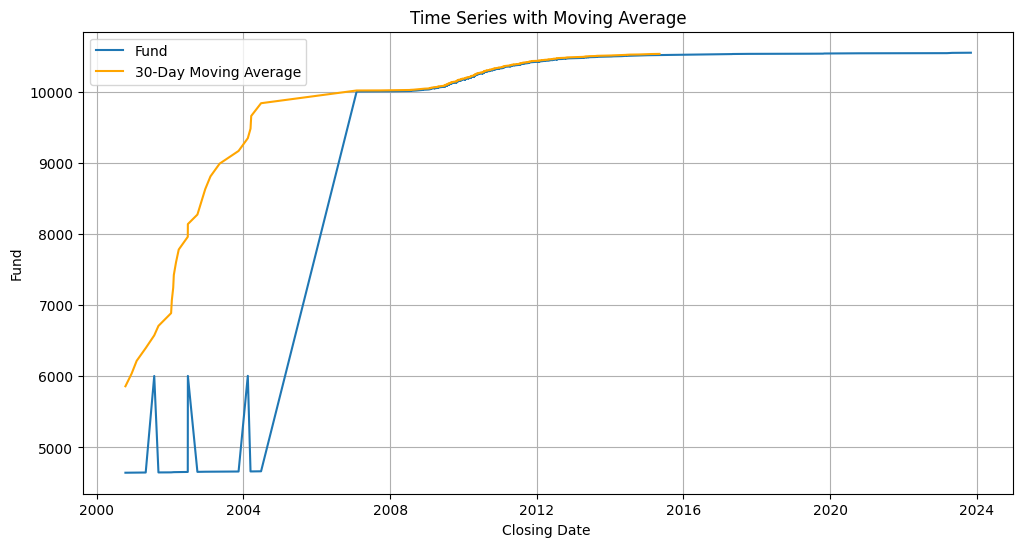

In [46]:
# 30 day moving average
df2['Fund_MA30'] = df2['Fund'].rolling(window=30).mean()

# Time series and moving average chart
plt.figure(figsize=(12, 6))
plt.plot(df2['Fund'], label='Fund')
plt.plot(df2['Fund_MA30'], label='30-Day Moving Average', color='orange')
plt.title('Time Series with Moving Average')
plt.xlabel('Closing Date\xa0')
plt.ylabel('Fund')
plt.legend()
plt.grid(True)
plt.show()


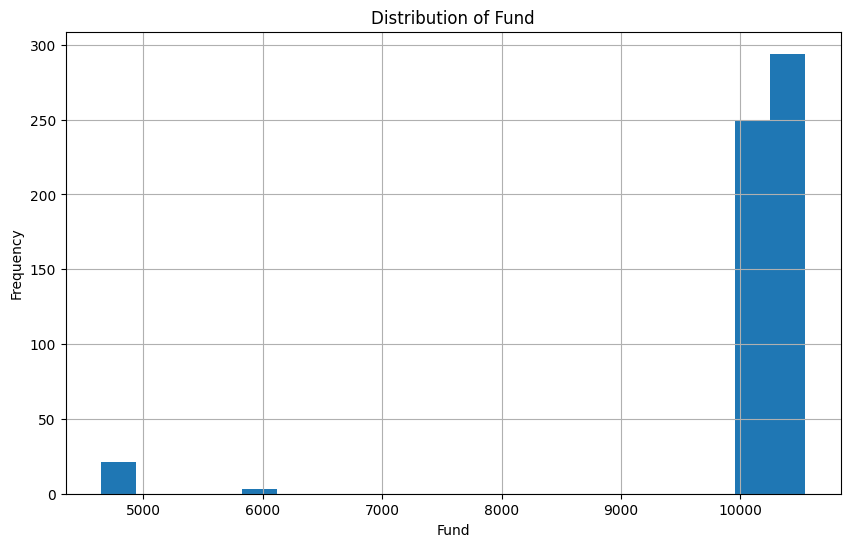

In [47]:
# Histogram of Fund column
plt.figure(figsize=(10, 6))
df2['Fund'].hist(bins=20)
plt.title('Distribution of Fund')
plt.xlabel('Fund')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [48]:
df2['Acquiring Institution\xa0']

Closing Date 
2023-11-03              Iowa Trust & Savings Bank
2023-07-28                 Dream First Bank, N.A.
2023-05-01              JPMorgan Chase Bank, N.A.
2023-03-12                    Flagstar Bank, N.A.
2023-03-10    FirstCitizens Bank & Trust Company
                             ...                 
2001-07-27                  Superior Federal, FSB
2001-05-03                      North Valley Bank
2001-02-02    Southern New Hampshire Bank & Trust
2000-12-14                Banterra Bank of Marion
2000-10-13                     Bank of the Orient
Name: Acquiring Institution , Length: 568, dtype: object

In [49]:
# Find the maximum and minimum values ​​by grouping the 'Bank Name' and 'Fund' columns
max_fund = df2.groupby('Acquiring Institution\xa0')['Fund'].max()
min_fund = df2.groupby('Acquiring Institution\xa0')['Fund'].min()

# Find banks with maximum and minimum 'Fund' values
max_bank = max_fund.idxmax()
min_bank = min_fund.idxmin()

# Find maximum and minimum 'Fund' values
max_fund_value = max_fund.max()
min_fund_value = min_fund.min()

print(f"Bank with Maximum Fund: {max_bank}, Fund Value: {max_fund_value}")
print(f"Bank with Minimum Fund: {min_bank}, Fund Value: {min_fund_value}")


Bank with Maximum Fund: Iowa Trust & Savings Bank, Fund Value: 10545
Bank with Minimum Fund: Bank of the Orient, Fund Value: 4645
